In [1]:
# Packages
# in CMD - pip install seaborn
#        - pip install ttkthemes
#        - pip install pyqt5
# in Jupyter Notebook - !pip install ttkthemes

import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from  matplotlib.ticker import PercentFormatter
import os
import warnings
warnings.filterwarnings(action='ignore')
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from distutils.util import strtobool
from ttkthemes import ThemedTk
from PyQt5 import QtWidgets
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt5agg import NavigationToolbar2QT as NavigationToolbar
import pathlib
from pandastable import Table, TableModel

In [2]:
# GUI

#curr_options = ["SINGLEPULSE", "PULSEDDYNAMIC", "PULSED"]
#curr_amps = ["A", "mA"]
#ordr = [1,2,3,4,5,6,7,8,9]
t_f = ['False', 'True']
#incs = [1,2,5,10]

def browse_button():
    # Allow user to select a directory and store it in global var
    # called folder_path
    global folder_path
    filename = filedialog.askdirectory()
    folder_path.set(filename)

root = ThemedTk(theme='adapta')
root.title("GUI")

# General Inputs
Label(root, text = "General Inputs", font=("Arial Bold", 12)).grid(row = 0, sticky = W)

Label(root, text = "Directory").grid(row = 1, sticky = W)
#Label(root, text = "Filenames").grid(row = 2, sticky = W)
Label(root, text = "Filetype").grid(row = 3, sticky = W)

# Output Info
Label(root, text = "Output Folder Location (If default - create gm_output_ov folder inside directory)").grid(row = 10, sticky = W)
# Overwrite or no
Label(root, text = "Allow Overwriting Output Files?").grid(row = 11, sticky = W)

# Graph Options
#Label(root, text = "Graph Options", font=("Arial Bold", 12)).grid(row = 12, sticky = W)

# What order
#Label(root, text = "Order (Ex: 1=Linear)").grid(row = 16, sticky = W)
# Show points or no
#Label(root, text = "Show Points?").grid(row = 17, sticky = W)
# Export or no as excel worksheet
Label(root, text = "Export as Excel Worksheet?").grid(row = 18, sticky = W)
Label(root, text = "Show Lambertain Graph?").grid(row = 19, sticky = W)
Label(root, text = "Show Fitted Line?").grid(row = 20, sticky = W) # Default == True

# Directory
folder_path = StringVar()
e0 = ttk.Entry(master=root,textvariable=folder_path)
#e0.insert(0, '')
dir_button = ttk.Button(text="Browse", command=browse_button)
# Filename(s)
#e1 = ttk.Entry(root)
#e1.insert(0, "30MILL-SANAM")
# Filetype
e2 = ttk.Entry(root)
e2.insert(0, ".xlsx")

# Output directory
e9 = ttk.Entry(root)
e9.insert(0, 'gm_output_ov')
# Dropdown menu
e10 = StringVar(root)
e10.set(t_f[0])
e10x = OptionMenu(root,e10,*t_f)

# Dropdown menu
#g5 = StringVar(root)
#g5.set(ordr[2])
#g5x = OptionMenu(root,g5,*ordr)

# Dropdown menu
#g6 = StringVar(root)
#g6.set(t_f[0])
#g6x = OptionMenu(root,g6,*t_f)

# Dropdown menu
g7 = StringVar(root)
g7.set(t_f[0])
g7x = OptionMenu(root,g7,*t_f)

# Dropdown menu
g8 = StringVar(root)
g8.set(t_f[0])
g8x = OptionMenu(root,g8,*t_f)

# Dropdown menu
g9 = StringVar(root)
g9.set(t_f[0])
g9x = OptionMenu(root,g9,*t_f)

e0.grid(row = 1, column = 1)
dir_button.grid(row=1, column=2)
#e1.grid(row = 2, column = 1)
e2.grid(row = 3, column = 1)
e9.grid(row = 10, column = 1)
e10x.grid(row = 11, column = 1)

#g5x.grid(row = 16, column = 1)
#g6x.grid(row = 17, column = 1)
g7x.grid(row = 18, column = 1)
g8x.grid(row = 19, column = 1)
g9x.grid(row = 20, column = 1)

def getInput():

    a = e0.get()
    #b = e1.get()
    c = e2.get()
    j = e9.get()
    k = e10.get()
    #q = int(g5.get())
    #r = g6.get()
    s = g7.get()
    t = g8.get()
    u = g9.get()
    
    root.destroy()

    global overall
    overall = [a,c,j,k,s,t,u]

root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)
    
ttk.Button(root, text = "Submit",
           command = getInput).grid(sticky = E, row = 50)
mainloop()

In [3]:
# Kill script if GUI has empty spots

import ctypes  # An included library with Python install.
def Mbox(title, text, style):
    return ctypes.windll.user32.MessageBoxW(0, text, title, style)

if '' in overall:
    Mbox('Error!', 'At least one entry in the GUI is empty - please fix', 0)
    sys.exit() # Kill script

In [4]:
# Input info
directory = pathlib.Path(overall[0])  # Provide the location of the excel files * Please use forward slashes
#name = overall[1]  #*RA* Provide the model a.k.a. everything before the temperature (prob change here)
file_type = overall[1]  # If reading in multiple files - they all have to be the same file type

# Output info
output_f = overall[2]  # <- This is where the folder where you would like to put all the images of the graphs
                     # NOTE: Put the desired location of where the folder is located here
                     # If the file is in the same location as your directory, all you need to do is put the folder name here
                     # * NO backward slashes only forward
# Allow Overwriting or no? - Default=False
over = bool(strtobool(overall[3]))

In [5]:
# Select the columns you want from the excel spreadsheet

select_cols = ['Filename', 'Number', 'Phi / °', 'Theta / °', 'Integration Time / ms', 'Source current - Currentsource / mA', 'Current - Currentsource / mA',
               'Voltage - Currentsource / V', 'Radiometric / W/m²', 'Photometric / lx', 'x - Color Coordinates',
              'y - Color Coordinates', 'u - Color Coordinates', 'v1976 - Color Coordinates', 'Peak Wavelength / nm', 
              'Centroid Wavelength / nm', 'Dominant Wavelength / nm', 'CRI', 'CRI09 - CRI'] 
               #'Partial luminous flux / lm', 'Partial radiant power / W'

# Add columns here for any calculations
# Calculated columns will be appended to the dataframe
#column_d = ['Voltage  - Currentsource / V', 'x - Color Coordinates', 'y - Color Coordinates', 'Peak Wavelength / nm', 
        #    'Dominant Wavelength / nm', 'Centroid Wavelength / nm'] # Change (-) columns
#column_p = ['Radiometric / W', 'Photometric / lm'] # Relative (%) columns

# Here: rename all selected columns & calculated columns - don't forget calculated columns are added towards the end
# Change columns first then relative columns

#column_rn = ['Serial Number', 'Δ Forward Voltage (Vf)', 'Δ CIEx', 'Δ CIEy', 'Δ Peak Wavelength (λp)', 'Δ Centroid Wavelength (λcen)', 
#             'Δ Dominant Wavelength (λd)', 'Δ CCT / K', 'Δ CRI', 'Δ R 9', 'Δ FWHM', 'Relative Radiant Power', 'Relative Luminous Flux', 'Tj (°C)', 'lf (A)' ]


# 'Last Dark Current (min)', 'Signal Level (counts)', 'Signal Level (%)', 'Scotopic Luminous Flux', 'UVA (W)', 'UVB (W)', 
# 'UVC (W)', 'VIS (W)', 'TRIx', 'TRIy', 'TRIz', 'CIEz', 'CIEu', 'v1960', 'v1976', 'Width (nm)', 'CRI', 'Red Effect (%)', 
# 'Vis Effect (%)', 'CCT',

In [6]:
# IMPORTANT - OUTPUT
# Select columns here - this is what outputs the graphs
# Add more columns & titles here if necessary

# Renamed name of temperature and current column

y1 = 'x - Color Coordinates'
y2 = 'y - Color Coordinates'
y3 = 'u - Color Coordinates'
y4 = 'v1976 - Color Coordinates'
y5 = 'Peak Wavelength / nm'
y6 = 'Centroid Wavelength / nm'
y7 = 'Dominant Wavelength / nm'
y8 = 'CRI'
y9 = 'CRI09 - CRI'

# Show all of y variables (number of columns that we would like outputs for), only change if removing or adding columns
y_n = [y1,y2,y3,y4,y5,y6,y7,y8,y9]

row_size = 5 # Make sure row and column size can accomodate all the subplots
column_size = 2
ax_n = [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1), (3,0), (3,1), (4,0)] # the axes for the subplots

# Graph order number - 1 = linear, 2 = quadratic, 3 = cubic, etc.
#ord_num = overall[4]

# Show points or no?
#show_pt = bool(strtobool(overall[5]))

# Export as Excel Worksheet or no?
exp = bool(strtobool(overall[4]))

# Export as Excel Worksheet or no?
lamb = bool(strtobool(overall[5]))

# Show Fitted Line?
fitt = bool(strtobool(overall[6]))

In [7]:
# Change directory
os.chdir(directory)
pathlib.Path.cwd()

WindowsPath('C:/Users/Chelton Kuang/Documents/gm_input_ov')

In [8]:
# Check whether the specified path exists or not
isExist = os.path.exists(output_f)

if not isExist:
  
  # Create output dir if doesn't exist
  os.makedirs(output_f)
  Mbox("Create output dir", "The output directory has been created: " + output_f, 0)

In [9]:
# Identifies all filenames in the directory

filesnames = os.listdir()
filesnames = [f for f in filesnames if f.lower().endswith(file_type)]

# Read in excel files as dataframe

# Here we concat similarly named files together - nice for putting together different test datasets on the same chips

#df = pd.concat(map(pd.read_excel, filesnames)) # Change to read_csv for csv files

df = pd.DataFrame()

for file in filesnames:
    df_temp = pd.read_excel(file)
    df_temp['Filename'] = file
    df = df.append(df_temp)

df['Filename'] = df['Filename'].str.rsplit('-', 1).str.get(0) # Get rid of last - character for easy calculations later
df = df[ ['Filename'] + [ col for col in df.columns if col != 'Filename' ] ]
df

,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Signal Level / Counts,Signal Level / %,Interface type,Trigger Delay / ms,Source current - Currentsource / mA,...,CRI,CRI09 - CRI,Partial luminous flux / lm,Partial radiant power / W,Date,Time,Distance probe to detector / mm,Calculated Luminous Intensity / cd,Calculated Radiant Intensity / W/sr,Name
0,CXM_6_X6_03_GROUP_3.xls,1,0,-90.0,15,326,0,CAS 120/140CT/140D - USB,0,50,...,87.514040,39.611681,0.038017,0.000201,5/10/2022,8:24:05 AM,316,1.109685,0.005875,C:\Users\Gonio\Desktop\GONIO_DATA\E000774\CXM-...
1,CXM_6_X6_03_GROUP_3.xls,2,0,-85.0,15,397,0,CAS 120/140CT/140D - USB,0,50,...,87.085357,33.249343,0.333541,0.001039,5/10/2022,8:24:07 AM,316,4.886615,0.015219,C:\Users\Gonio\Desktop\GONIO_DATA\E000774\CXM-...
2,CXM_6_X6_03_GROUP_3.xls,3,0,-80.0,15,519,0,CAS 120/140CT/140D - USB,0,50,...,86.423620,30.911354,0.755454,0.002339,5/10/2022,8:24:08 AM,316,11.195893,0.034658,C:\Users\Gonio\Desktop\GONIO_DATA\E000774\CXM-...
3,CXM_6_X6_03_GROUP_3.xls,4,0,-75.0,15,625,1,CAS 120/140CT/140D - USB,0,50,...,86.388782,30.230695,1.167933,0.003760,5/10/2022,8:24:09 AM,316,17.647018,0.056811,C:\Users\Gonio\Desktop\GONIO_DATA\E000774\CXM-...
4,CXM_6_X6_03_GROUP_3.xls,5,0,-70.0,15,756,1,CAS 120/140CT/140D - USB,0,50,...,86.432975,30.738795,1.563509,0.004446,5/10/2022,8:24:10 AM,316,24.283746,0.069056,C:\Users\Gonio\Desktop\GONIO_DATA\E000774\CXM-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,CXM_9_X92_19_GROUP_2.xls,144,135,-70.0,15,726,1,CAS 120/140CT/140D - USB,0,50,...,87.171879,32.544984,1.547831,0.004605,5/10/2022,8:01:41 AM,316,24.040243,0.071520,C:\Users\Gonio\Desktop\GONIO_DATA\E000774\SN_X...
144,CXM_9_X92_19_GROUP_2.xls,145,135,-75.0,15,589,0,CAS 120/140CT/140D - USB,0,50,...,87.183555,32.751635,1.071314,0.003391,5/10/2022,8:01:42 AM,316,16.187147,0.051229,C:\Users\Gonio\Desktop\GONIO_DATA\E000774\SN_X...
145,CXM_9_X92_19_GROUP_2.xls,146,135,-80.0,15,458,0,CAS 120/140CT/140D - USB,0,50,...,87.393447,34.041686,0.603918,0.001793,5/10/2022,8:01:44 AM,316,8.950115,0.026570,C:\Users\Gonio\Desktop\GONIO_DATA\E000774\SN_X...
146,CXM_9_X92_19_GROUP_2.xls,147,135,-85.0,15,367,0,CAS 120/140CT/140D - USB,0,50,...,86.809674,33.493279,0.221763,0.000909,5/10/2022,8:01:45 AM,316,3.248985,0.013317,C:\Users\Gonio\Desktop\GONIO_DATA\E000774\SN_X...


In [10]:
# Double check if imported worksheets are not empty - if empty, script is killed

if df.empty:
    Mbox('Error!', 'Imported worksheets are empty', 0)
    sys.exit() # Kill script

In [11]:
# Double check if expected columns are not missing

try:
    df = df[select_cols]
except KeyError as e:
    Mbox('Error!', repr(e) + '\n Fix then Restart & Run All', 0)
    sys.exit() # Kill script

In [12]:
# Select columns needed - ADD OR REMOVE AS NEEDED

df = df.fillna(0)

#df = df[df[cols_puls] == pulse_width]
#df = df.drop([cols_puls], axis=1)
#df = df.dropna()
#df

In [13]:
# Check for any zeros
'''
xdl = []
xd = df[(df.iloc[:,3:] == 0).any(axis=1)]
for i in xd['Number'].unique():
    xdl.append(i)

if xdl:
    Mbox('Warning!', 'Please double-check these numbers / rows - ' + str(xdl) + '\n The rows will be dropped.', 0)
    ''';

In [14]:
# Drop any rows that have 0s
'''
indices = df.loc[(df.iloc[:,3:] == 0).any(axis=1), :].index.tolist()
for ind in indices:
    df = df.drop(ind)
''';

In [15]:
# If Voltage above 200v, point out row and drop

df_200v = df[df['Voltage - Currentsource / V'] >= 200]
df = df[df['Voltage - Currentsource / V'] < 200]
if not df_200v.empty:
    class TestApp(Frame):
        """Basic test frame for the table"""
        def __init__(self, parent=None):
            self.parent = parent
            Frame.__init__(self)
            self.main = self.master
            self.main.geometry('600x400+200+100')
            self.main.title('Observations above 200v which will be dropped')
            f = Frame(self.main)
            f.pack(fill=BOTH,expand=1)
            self.table = pt = Table(f, dataframe=df_200v,
                                    showtoolbar=True, showstatusbar=True)
            pt.show()
            return

    app = TestApp()
    #launch the app
    app.mainloop()
    #Mbox('Warning!', 'At least one observation has voltage above 200v \n they will be dropped', 0)

In [16]:
# To change font specifically - fontname = 'provide font name'
# To change font globally - plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})

plt.rc('font', **{'family' : 'sans-serif', 'sans-serif' : ['Myriad Pro']})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=14)

In [17]:
# Function for version checking saved images for pngs

def version_png(fname):
    i = 0
    filename = fname
    while os.path.exists('{}{:d}.png'.format(filename, i)):
        i += 1
    plt.savefig('{}{:d}.png'.format(filename, i), bbox_inches='tight')

# Average of each part

In [18]:
dfs = df.groupby(['Filename', 'Phi / °', 'Theta / °']).max().reset_index()
#dfs = dfs.drop(['Filename'], axis=1)
new_cols = [col for col in dfs.columns if col != 'Filename'] + ['Filename']
dfs = dfs[new_cols]

In [19]:
# Calculations (one df for max normalization & another for theta = 0 normalization)

dfmax = dfs.groupby(['Phi / °', 'Filename']).max().reset_index()
new_cols = [col for col in dfmax.columns if col != 'Filename'] + ['Filename']
dfmax = dfmax[new_cols]
dftheta = dfs[dfs['Theta / °'] == 0]

# Columns besides radiometric & photometric are normalized to theta = 0
test = (dfs.set_index(['Phi / °','Filename']).iloc[:,8:17]-dftheta.set_index(['Phi / °','Filename']).iloc[:,8:17]).dropna(axis=0).reset_index()
test2 = (dfs.set_index(['Phi / °','Filename']).iloc[:,[6,7]] / dfmax.set_index(['Phi / °','Filename']).iloc[:,[6,7]]).dropna(axis=0).reset_index()
test2.iloc[:,1:] = test2.iloc[:,1:].mul(100)

# Max normalized for radio & photo, rest are theta normalized
dfmaxz = pd.concat([dfs.iloc[:,0:7], test2.iloc[:,2:], test.iloc[:,2:], dfs.iloc[:,-1]], axis=1)

# All theta normalized
test2 = (dfs.set_index(['Phi / °','Filename']).iloc[:,[6,7]] / dftheta.set_index(['Phi / °','Filename']).iloc[:,[6,7]]).dropna(axis=0).reset_index()
test2.iloc[:,1:] = test2.iloc[:,1:].mul(100)
dfthetaz = pd.concat([dfs.iloc[:,0:7], test2.iloc[:,2:], test.iloc[:,2:], dfs.iloc[:,-1]], axis=1)

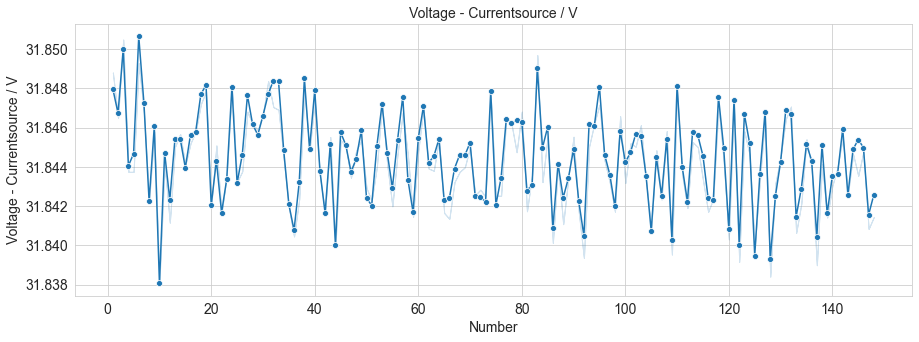

In [20]:
# Number vs Voltage
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,5

sns.set_style("whitegrid")
sns.lineplot(x='Number', y='Voltage - Currentsource / V', data=dfs, ci=False, marker = 'o')
plt.title('Voltage - Currentsource / V', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Voltage_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Voltage.png', bbox_inches='tight');

# Radiometric - By Phi

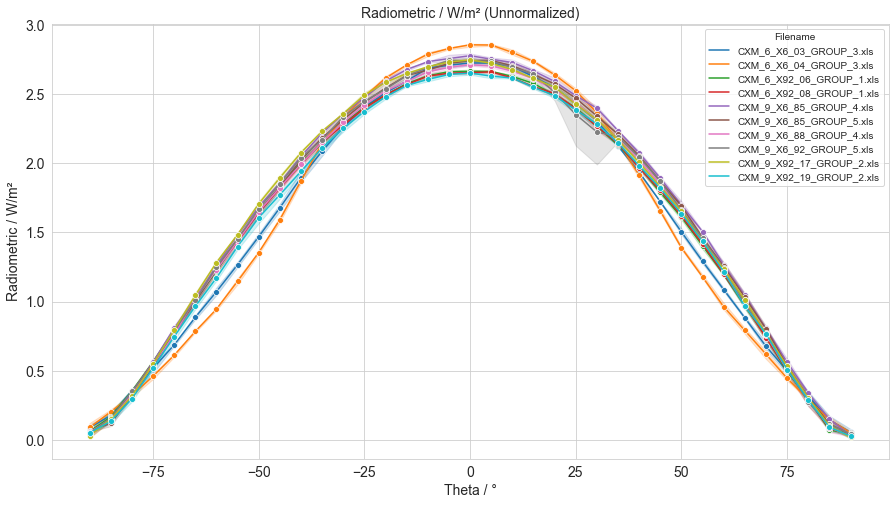

In [21]:
# Theta vs Radiometric by Phi (Unnormalized)

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', hue = 'Filename', data=dfs, marker='o')
plt.title('Radiometric / W/m² (Unnormalized)', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Radio_Unnorm_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Radio_Unnorm.png', bbox_inches='tight');

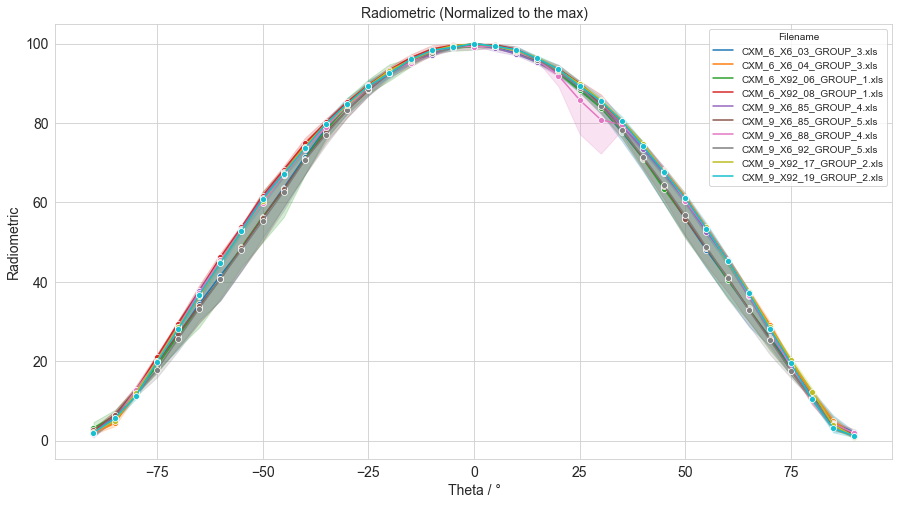

In [22]:
# Theta vs Radiometric by Phi (Normalized to the max)

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', hue = 'Filename', data=dfmaxz, marker='o').set_ylabel("Radiometric")
plt.title('Radiometric (Normalized to the max)', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Radio_Max_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Radio_Max.png', bbox_inches='tight');

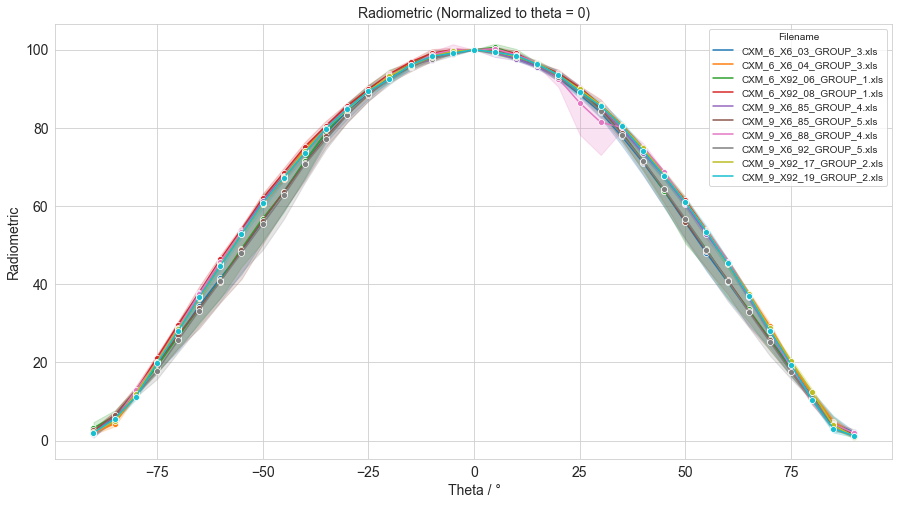

In [23]:
# Theta vs Radiometric by Phi (Normalized to theta = 0)

sns.lineplot(x='Theta / °', y='Radiometric / W/m²', hue = 'Filename', data=dfthetaz, marker='o').set_ylabel("Radiometric")
plt.title('Radiometric (Normalized to theta = 0)', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Radio_Theta0_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Radio_Theta0.png', bbox_inches='tight');

# Radiometric - Theta Absolute Values

In [24]:
dfs['Theta_Abs'] = dfs['Theta / °'].abs()
dfmaxz['Theta_Abs'] = dfmaxz['Theta / °'].abs()
dfthetaz['Theta_Abs'] = dfthetaz['Theta / °'].abs()

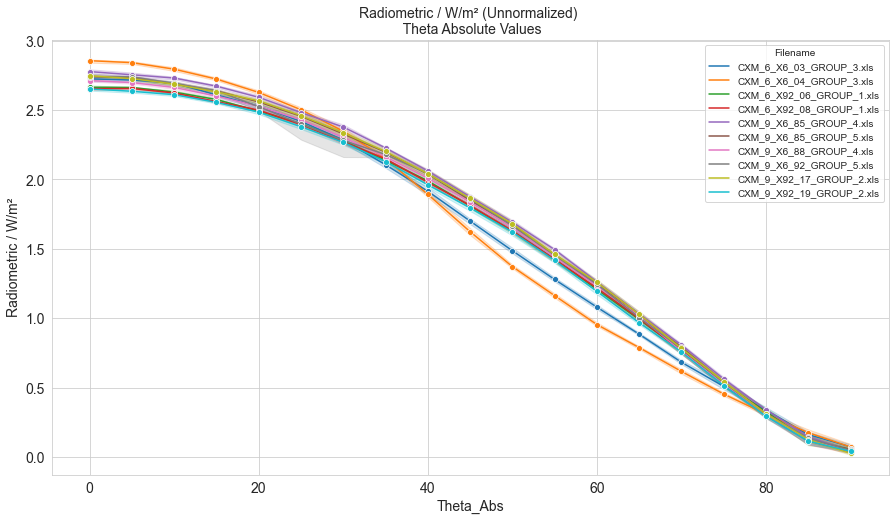

In [25]:
# Theta vs Radiometric by Phi (Unnormalized) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', hue = 'Filename', data=dfs, marker='o')
plt.title('Radiometric / W/m² (Unnormalized) \n Theta Absolute Values', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Radio_Unnorm_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Radio_Unnorm_Abs.png', bbox_inches='tight');

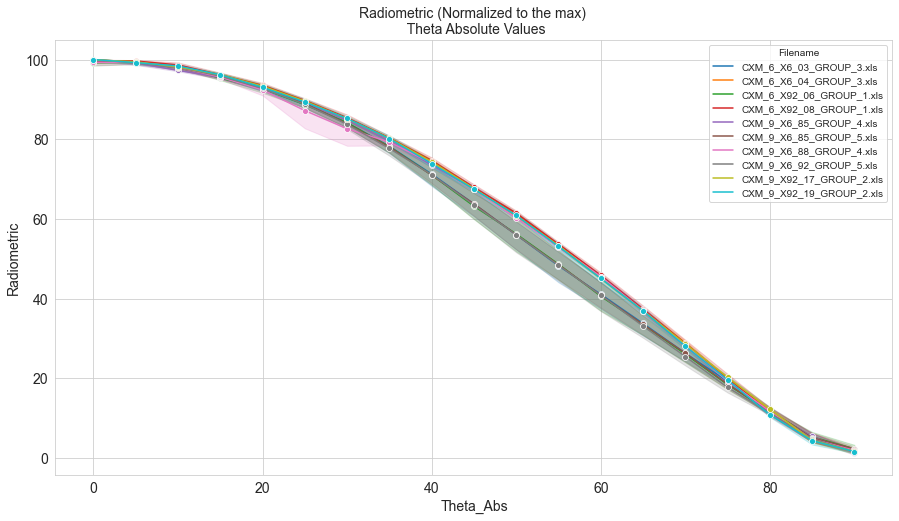

In [26]:
# Theta vs Radiometric by Phi (Normalized to the max) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', hue = 'Filename', data=dfmaxz, marker='o').set_ylabel("Radiometric")
plt.title('Radiometric (Normalized to the max) \n Theta Absolute Values', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Radio_Max_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Radio_Max_Abs.png', bbox_inches='tight');

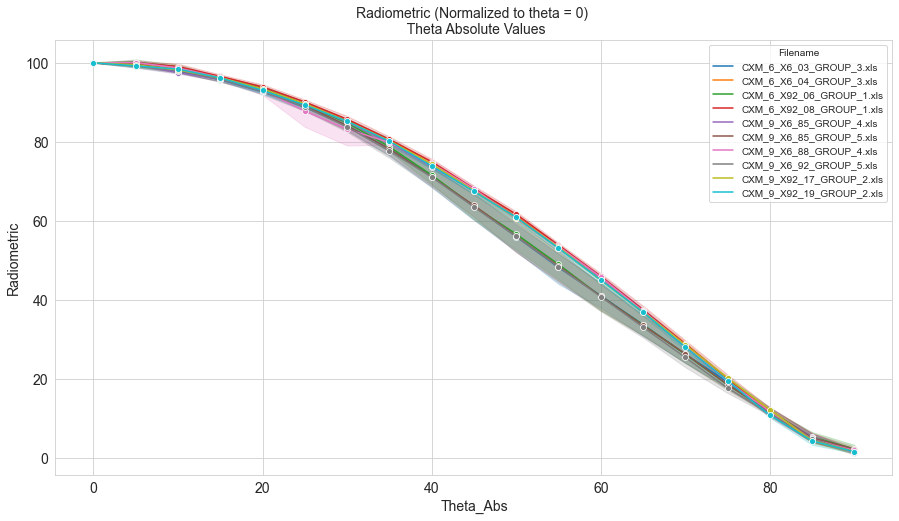

In [27]:
# Theta vs Radiometric by Phi (Normalized to theta = 0) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Radiometric / W/m²', hue = 'Filename', data=dfthetaz, marker='o').set_ylabel("Radiometric")
plt.title('Radiometric (Normalized to theta = 0) \n Theta Absolute Values', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Radio_Theta0_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Radio_Theta0_Abs.png', bbox_inches='tight');

# Photometric - By Phi

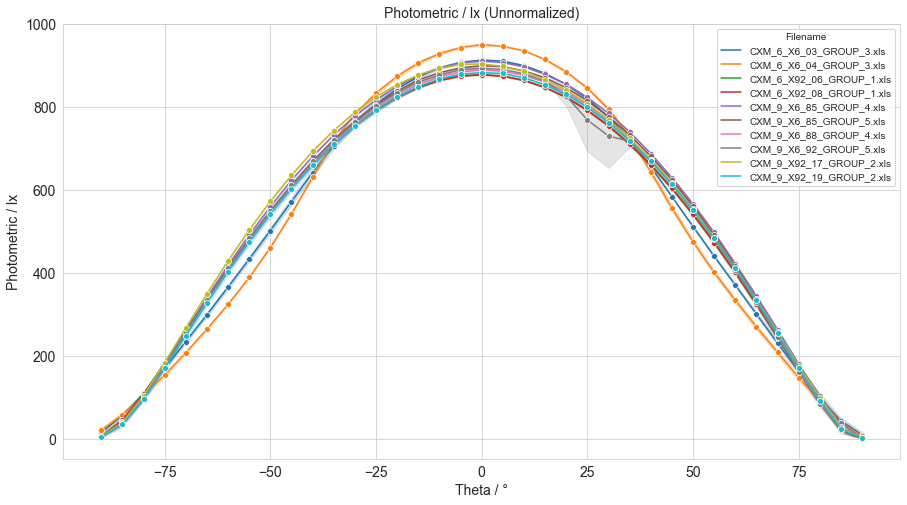

In [28]:
# Theta vs Photometric by Phi (Unnormalized)

sns.lineplot(x='Theta / °', y='Photometric / lx', hue = 'Filename', data=dfs, marker='o')
plt.title('Photometric / lx (Unnormalized)', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Photo_Unnorm_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Photo_Unnorm.png', bbox_inches='tight');

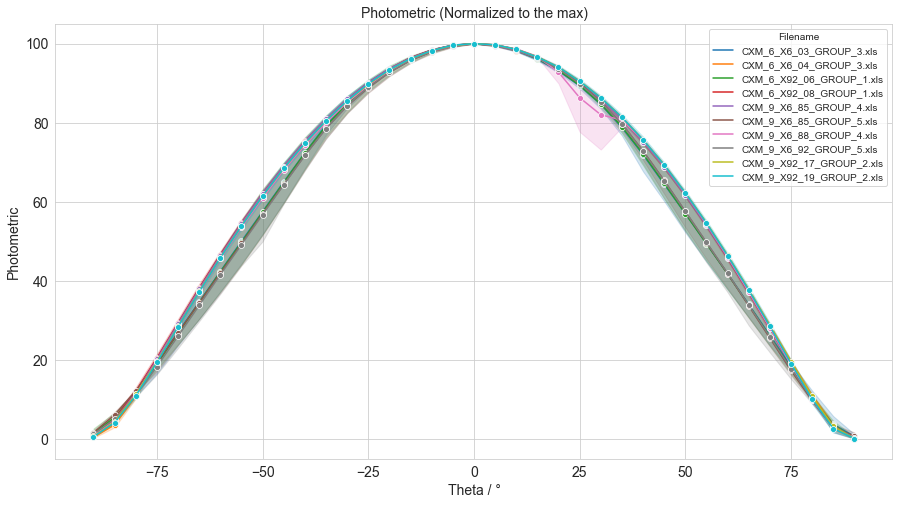

In [29]:
# Theta vs Photometric by Phi (Normalized to the max)

sns.lineplot(x='Theta / °', y='Photometric / lx', hue = 'Filename', data=dfmaxz, marker='o').set_ylabel("Photometric")
plt.title('Photometric (Normalized to the max)', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Photo_Max_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Photo_Max.png', bbox_inches='tight');

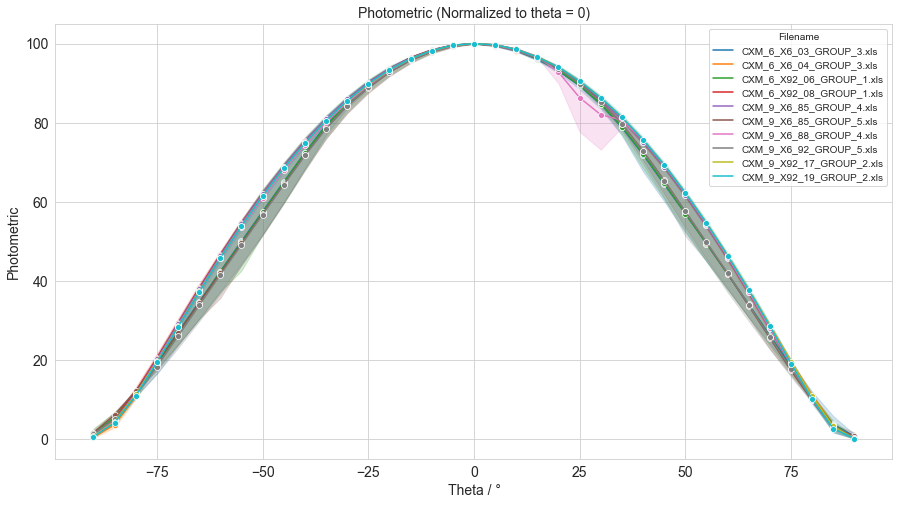

In [30]:
# Theta vs Photometric by Phi (Normalized to theta = 0)

sns.lineplot(x='Theta / °', y='Photometric / lx', hue = 'Filename', data=dfthetaz, marker='o').set_ylabel("Photometric")
plt.title('Photometric (Normalized to theta = 0)', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Photo_Theta0_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Photo_Theta0.png', bbox_inches='tight');

# Photometric - Theta Absolute Values

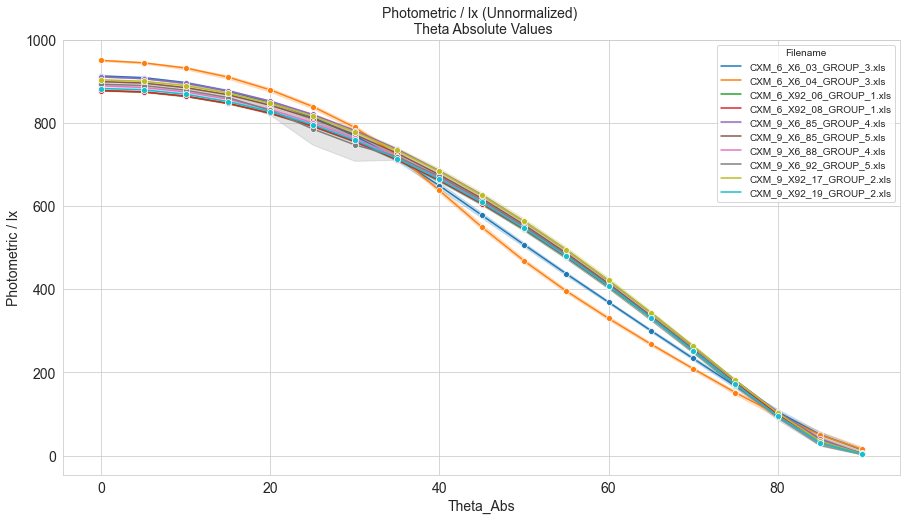

In [31]:
# Theta vs Radiometric by Phi (Unnormalized) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Photometric / lx', hue = 'Filename', data=dfs, marker='o')
plt.title('Photometric / lx (Unnormalized) \n Theta Absolute Values', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Photo_Unnorm_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Photo_Unnorm_Abs.png', bbox_inches='tight');

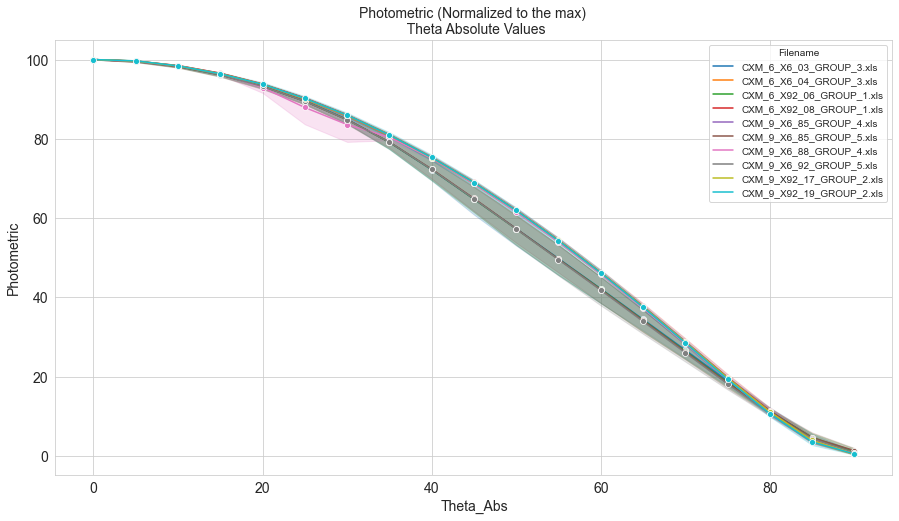

In [32]:
# Theta vs Radiometric by Phi (Normalized to the max) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Photometric / lx', hue = 'Filename', data=dfmaxz, marker='o').set_ylabel("Photometric")
plt.title('Photometric (Normalized to the max) \n Theta Absolute Values', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Photo_Max_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Photo_Max_Abs.png', bbox_inches='tight');

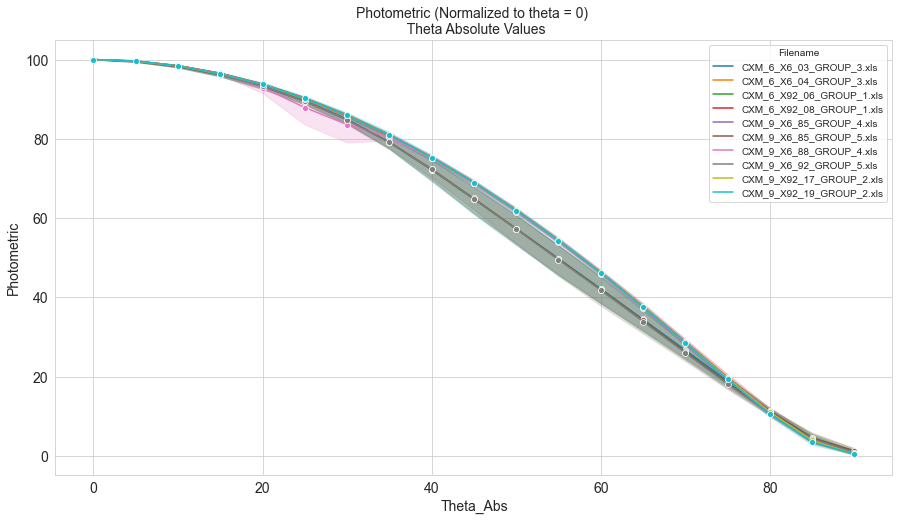

In [33]:
# Theta vs Radiometric by Phi (Normalized to theta = 0) - Theta Absolute Values

rcParams['figure.figsize'] = 15,8

sns.lineplot(x='Theta_Abs', y='Photometric / lx', hue = 'Filename', data=dfthetaz, marker='o').set_ylabel("Photometric")
plt.title('Photometric (Normalized to theta = 0) \n Theta Absolute Values', fontsize = 14)
if over == False:
    fname = output_f + '/Overlap_Photo_Theta0_Abs_'
    version_png(fname)
else:
    plt.savefig(output_f + '/Overlap_Photo_Theta0_Abs.png', bbox_inches='tight');

# Polar Coordinates Plot

In [34]:
# Function for version checking saved images for pngs

def version_pdf_p(fname):
    i = 0
    filename = fname
    while os.path.exists('{}{:d}.pdf'.format(filename, i)):
        i += 1
    fig.savefig('{}{:d}.pdf'.format(filename, i), dpi=1000, bbox_inches='tight')

In [35]:
# For Polar Plot - Select either Radiometric or Photometric in pop-up box

sel_list = ['Radiometric / W/m²', 'Photometric / lx']

root = ThemedTk(theme='arc')
root.title("GUI for Polar Plot")

Label(root, text = "Select Radiometric or Photometric").grid(row = 1, sticky = W)

e7 = StringVar(root)
e7.set(sel_list[0])
drop = ttk.OptionMenu(root,e7,*sel_list)

drop.grid(row = 2)
    
def kill():
    global h
    h = e7.get()
    root.destroy()
    
ttk.Button(root, text = "Submit",
        command = kill).grid(row = 50)

root.mainloop()

sel = h # or Photometric

In [36]:
# Groupby theta and take means - able to draw a nice curve

dfmaxz_mean = dfmaxz.groupby('Theta_Abs').mean().reset_index()
dfmaxz_mean[sel] = dfmaxz_mean[sel]/100

In [37]:
import math  # Change degrees to radians for plotting
def deg_to_rad(dr):
    return (dr*math.pi)/180
theta = deg_to_rad(dfmaxz_mean['Theta_Abs'])
theta_abs = dfmaxz_mean['Theta_Abs']
r = dfmaxz_mean[sel]

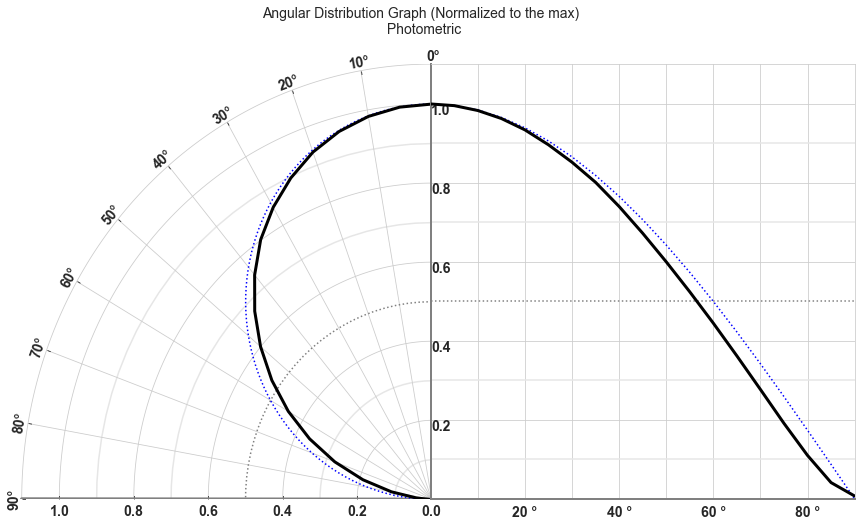

In [38]:
# Polar plot - Normalized to the max

from matplotlib.transforms import Affine2D
from matplotlib.projections import PolarAxes
from mpl_toolkits.axisartist.floating_axes import GridHelperCurveLinear, FloatingSubplot
import mpl_toolkits.axisartist.floating_axes as floating_axes
import mpl_toolkits.axisartist.grid_finder as gf
from matplotlib.ticker import EngFormatter, StrMethodFormatter

rcParams["font.weight"] = "bold"

def setup_axes0_max(fig, rect):
    tr_rotate = Affine2D().translate(1.57, 0)
    polar_trans = tr_rotate + PolarAxes.PolarTransform()

    # Setup the axis, here we map angles in degrees to angles in radius
    phi_degree = np.arange(0, 100, 10)
    a = list(phi_degree)
    al = [str(x) + f"\N{DEGREE SIGN}" for x in a] # List of angles with degree symbols
    tlocs = phi_degree * np.pi / 180
    gl1 = gf.FixedLocator(tlocs)  # Positions
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, al))))

    # Standard deviation axis extent
    radius_min = 0
    radius_max = 1.1+0.001
    
    majors = np.linspace(0, 1, 6)
    grid_locator2 = gf.FixedLocator(majors)

    # Set up the axes range in the parameter "extremes"
    grid_helper = GridHelperCurveLinear(polar_trans, extremes=(0, np.pi / 2,  # 1st quadrant
                                                           radius_min, radius_max),
                                    grid_locator1=gl1,
                                    grid_locator2=grid_locator2,
                                    tick_formatter1=tf1,
                                    )
    
    ax0 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax0, zorder=1)

    # Adjust axes
    ax0.axis["top"].set_axis_direction("bottom")  # "Angle axis"
    ax0.axis["top"].toggle(ticklabels=True, label=True)
    ax0.axis["top"].major_ticklabels.set_axis_direction("top")
    ax0.axis["top"].label.set_axis_direction("top")
    #ax0.axis["top"].label.set_text("angle (deg)")

    ax0.axis["left"].set_visible(False)
    #ax0.axis["left"].set_axis_direction("left")  # "X axis"
    #ax0.axis["left"].label.set_text("radius")

    ax0.axis["right"].set_axis_direction("top")  # "Y axis"
    ax0.axis["right"].toggle(ticklabels=True)
    ax0.axis["right"].major_ticklabels.set_axis_direction("bottom")
    ax0.axis["right"].line.set_linewidth(3.5)
    ax0.axis["right"].line.set_color('gray')

    ax0.axis["bottom"].set_visible(False)  # Useless

    # Contours along standard deviations
    ax0.grid(True)
    #ax0.set_title("Quarter polar plot")
    ax0.set_ylim(0, 1.1)

    data_ax = ax0.get_aux_axes(polar_trans)  # return the axes that can be plotted on
    
    # Add second subplot on right

    return ax0, data_ax


if __name__ == "__main__":
    
    fig = plt.figure(figsize=(15,8))
    fig.suptitle('Angular Distribution Graph (Normalized to the max) \n ' + sel.split(' ', 1)[0], fontsize = 14)
    fig.subplots_adjust(wspace=0, hspace=0)
    
    # Left - polar plot
    ax0, aux_ax0 = setup_axes0_max(fig, 121)
    aux_ax0.plot(theta, r, c='black', zorder=111, linewidth=3)
    p = np.polyfit(theta, r, 5) # 5th order fit
    yfit = np.polyval(p, theta)
    # The fit plot
    #if fitt == True:
    #    aux_ax0.plot(theta, yfit, '-', zorder=11)
    # Radial = 0.5 plot
    aux_ax0.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*0.5, color='gray', linestyle='dotted')
    # Add additional radial lines
    lin = [0.1,0.3,0.7,0.9]
    for i in lin:
        aux_ax0.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*i, color='0.9', linestyle='-', zorder = 0)
    # Add optional lambertian graph
    theta_op = np.arange(0, 2 * np.pi, .01)[1:]
    r_op = np.cos(theta_op)
    r_op = np.abs(r_op)
    if lamb == True:
        aux_ax0.plot(theta_op, r_op, c='blue', linestyle='dotted', zorder=11)
    
    # Right - normal plot
    ax1 = plt.subplot(122, sharey=ax0, zorder=2)
    ax1.tick_params(axis="y",direction="in", pad=-20)
    # Adjust thickness and color of axes
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['bottom'].set_color('gray')
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['left'].set_color('gray')
    ax1.plot(theta_abs, r, c='black', zorder=111, linewidth=3)
    # Only show tick labels multiple of 20
    ax1.set_xticks([0,10,20,30,40,50,60,70,80,90])
    xticks = ax1.xaxis.get_major_ticks()
    xt = [0,1,3,5,7,9]
    for x in xt:
        xticks[x].label1.set_visible(False)
    ax1.yaxis.get_major_ticks()[0].label1.set_visible(False)
    p = np.polyfit(theta_abs, r, 5)
    yfit = np.polyval(p, theta_abs)
    # The fit plot
    #if fitt == True:
    #    ax1.plot(theta_abs, yfit, '-', zorder=11)
    # Radial = 0.5 plot
    ax1.hlines(y=0.5, xmin = 0, xmax = 90, color='gray', linestyle='dotted')
    # Add additional radial lines
    for i in lin:
        ax1.hlines(y=i, xmin = 0, xmax = 90, color='0.9', linestyle='-')
    ax1.margins(x=0)
    # Show tick labels below ticks
    for tick in ax1.yaxis.get_majorticklabels():
        tick.set_verticalalignment("top")
    # Add degree symbol to x-axis
    ax1.xaxis.set_major_formatter(EngFormatter(unit=u"°"))

    # Add optional lambertian graph to other graph
    z = np.cos(theta)
    if lamb == True:
        ax1.plot(theta_abs, z, c='blue', linestyle='dotted', zorder=11)
    box = ax1.get_position()
    box.x0 = box.x0 - 0.005
    box.y0 = box.y0 + 0.001
    ax1.set_position(box)
    # Manually add 0 degree symbol since it randomly disappeared
    plt.text(-1, 1.11, f"0\N{DEGREE SIGN}", fontsize = 14) #10
    if over == False:
        fname = output_f + '/' + 'Overlap_Polar_Max_' + sel[:5] + '_'
        version_pdf_p(fname)
    else:
        fig.savefig(output_f + '/' + 'Overlap_Polar_Max_' + sel[:5] + '.pdf', dpi=1000, bbox_inches='tight')
    plt.show();

In [39]:
# Groupby theta and take means - able to draw a nice curve

dfthetaz_mean = dfthetaz.groupby('Theta_Abs').mean().reset_index()
dfthetaz_mean[sel] = dfthetaz_mean[sel]/100

In [40]:
import math  # Change degrees to radians for plotting
def deg_to_rad(dr):
    return (dr*math.pi)/180
theta = deg_to_rad(dfthetaz_mean['Theta_Abs'])
theta_abs = dfthetaz_mean['Theta_Abs']
r = dfthetaz_mean[sel]

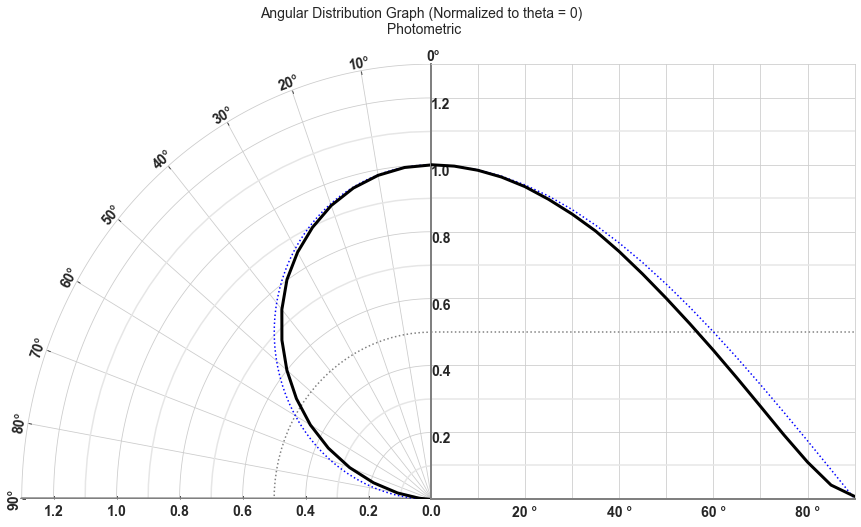

In [41]:
# Polar plot - Normalized to theta = 0

rcParams["font.weight"] = "bold"

def setup_axes0_theta(fig, rect):
    tr_rotate = Affine2D().translate(1.57, 0)
    polar_trans = tr_rotate + PolarAxes.PolarTransform()

    # Setup the axis, here we map angles in degrees to angles in radius
    phi_degree = np.arange(0, 100, 10)
    a = list(phi_degree)
    al = [str(x) + f"\N{DEGREE SIGN}" for x in a] # List of angles with degree symbols
    tlocs = phi_degree * np.pi / 180
    gl1 = gf.FixedLocator(tlocs)  # Positions
    tf1 = gf.DictFormatter(dict(zip(tlocs, map(str, al))))

    # Standard deviation axis extent
    radius_min = 0
    radius_max = 1.3+0.001
    
    majors = np.linspace(0, 1.2, 7)
    grid_locator2 = gf.FixedLocator(majors)

    # Set up the axes range in the parameter "extremes"
    grid_helper = GridHelperCurveLinear(polar_trans, extremes=(0, np.pi / 2,  # 1st quadrant
                                                           radius_min, radius_max),
                                    grid_locator1=gl1,
                                    grid_locator2=grid_locator2,
                                    tick_formatter1=tf1,
                                    )
    
    ax0 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax0, zorder=1)

    # Adjust axes
    ax0.axis["top"].set_axis_direction("bottom")  # "Angle axis"
    ax0.axis["top"].toggle(ticklabels=True, label=True)
    ax0.axis["top"].major_ticklabels.set_axis_direction("top")
    ax0.axis["top"].label.set_axis_direction("top")
    #ax0.axis["top"].label.set_text("angle (deg)")

    ax0.axis["left"].set_visible(False)
    #ax0.axis["left"].set_axis_direction("left")  # "X axis"
    #ax0.axis["left"].label.set_text("radius")

    ax0.axis["right"].set_axis_direction("top")  # "Y axis"
    ax0.axis["right"].toggle(ticklabels=True)
    ax0.axis["right"].major_ticklabels.set_axis_direction("bottom")
    ax0.axis["right"].line.set_linewidth(3.5)
    ax0.axis["right"].line.set_color('gray')

    ax0.axis["bottom"].set_visible(False)  # Useless

    # Contours along standard deviations
    ax0.grid(True)
    #ax0.set_title("Quarter polar plot")
    ax0.set_ylim(0, 1.3)

    data_ax = ax0.get_aux_axes(polar_trans)  # return the axes that can be plotted on
    
    # Add second subplot on right

    return ax0, data_ax


if __name__ == "__main__":
    
    fig = plt.figure(figsize=(15,8))
    fig.suptitle('Angular Distribution Graph (Normalized to theta = 0) \n ' + sel.split(' ', 1)[0], fontsize = 14)
    fig.subplots_adjust(wspace=0, hspace=0)
    
    # Left - polar plot
    ax0, aux_ax0 = setup_axes0_theta(fig, 121)
    aux_ax0.plot(theta, r, c='black', zorder=111, linewidth=3)
    p = np.polyfit(theta, r, 5) # 5th order fit
    yfit = np.polyval(p, theta)
    # The fit plot
    #if fitt == True:
    #    aux_ax0.plot(theta, yfit, '-', zorder=11)
    # Radial = 0.5 plot
    aux_ax0.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*0.5, color='gray', linestyle='dotted')
    # Add additional radial lines
    lin = [0.1,0.3,0.7,0.9,1.1]
    for i in lin:
        aux_ax0.plot(np.linspace(0, 2*np.pi, 100), np.ones(100)*i, color='0.9', linestyle='-')
    # Add optional lambertian graph
    theta_op = np.arange(0, 2 * np.pi, .01)[1:]
    r_op = np.cos(theta_op)
    r_op = np.abs(r_op)
    if lamb == True:
        aux_ax0.plot(theta_op, r_op, c='blue', linestyle='dotted', zorder=11)
    
    # Right - normal plot
    ax1 = plt.subplot(122, sharey=ax0, zorder=0)
    ax1.tick_params(axis="y",direction="in", pad=-20)
    # Adjust thickness and color of axes
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['bottom'].set_color('gray')
    ax1.spines['left'].set_linewidth(2)
    ax1.spines['left'].set_color('gray')
    ax1.plot(theta_abs, r, c='black', zorder=111, linewidth=3)
    # Only show tick labels multiple of 20
    ax1.set_xticks([0,10,20,30,40,50,60,70,80,90])
    xticks = ax1.xaxis.get_major_ticks()
    xt = [0,1,3,5,7,9]
    for x in xt:
        xticks[x].label1.set_visible(False)
    ax1.yaxis.get_major_ticks()[0].label1.set_visible(False)
    p = np.polyfit(theta_abs, r, 5)
    yfit = np.polyval(p, theta_abs)
    # The fit plot
    #if fitt == True:
    #    ax1.plot(theta_abs, yfit, '-', zorder=11)
    # Radial = 0.5 plot
    ax1.hlines(y=0.5, xmin = 0, xmax = 90, color='gray', linestyle='dotted')
    # Add additional radial lines
    for i in lin:
        ax1.hlines(y=i, xmin = 0, xmax = 90, color='0.9', linestyle='-')
    ax1.margins(x=0)
    # Show tick labels below ticks
    for tick in ax1.yaxis.get_majorticklabels():
        tick.set_verticalalignment("top")
    # Add degree symbol to x-axis
    ax1.xaxis.set_major_formatter(EngFormatter(unit=u"°"))

    # Add optional lambertian graph to other graph
    z = np.cos(theta)
    if lamb == True:
        ax1.plot(theta_abs, z, c='blue', linestyle='dotted', zorder=11)
    box = ax1.get_position()
    box.x0 = box.x0 - 0.005
    box.y0 = box.y0 + 0.001
    ax1.set_position(box)
    # Manually add 0 degree symbol since it randomly disappeared
    plt.text(-1, 1.31, f"0\N{DEGREE SIGN}", fontsize = 14) #10
    if over == False:
        fname = output_f + '/' + 'Overlap_Polar_Theta0_' + sel[:5] + '_'
        version_pdf_p(fname)
    else:
        fig.savefig(output_f + '/' + 'Overlap_Polar_Theta0_' + sel[:5] + '.pdf', dpi=1000, bbox_inches='tight')
    plt.show();

In [42]:
# Function for popup window
class ScrollableWindow(QtWidgets.QMainWindow):
    def __init__(self, fig):
        self.qapp = QtWidgets.QApplication([])

        QtWidgets.QMainWindow.__init__(self)
        title = 'GM Graphs'
        self.setWindowTitle(title)
        self.widget = QtWidgets.QWidget()
        self.setCentralWidget(self.widget)
        self.widget.setLayout(QtWidgets.QVBoxLayout())
        self.widget.layout().setContentsMargins(0,0,0,0)
        self.widget.layout().setSpacing(0)

        self.fig = fig
        self.canvas = FigureCanvas(self.fig)
        self.canvas.draw()
        self.scroll = QtWidgets.QScrollArea(self.widget)
        self.scroll.setWidget(self.canvas)

        self.nav = NavigationToolbar(self.canvas, self.widget)
        self.widget.layout().addWidget(self.nav)
        self.widget.layout().addWidget(self.scroll)

        self.show()
        self.qapp.exec_()

In [43]:
# Function for version checking saved images for pngs

def version_png_f(fname):
    i = 0
    filename = fname
    while os.path.exists('{}{:d}.png'.format(filename, i)):
        i += 1
    f.savefig('{}{:d}.png'.format(filename, i))

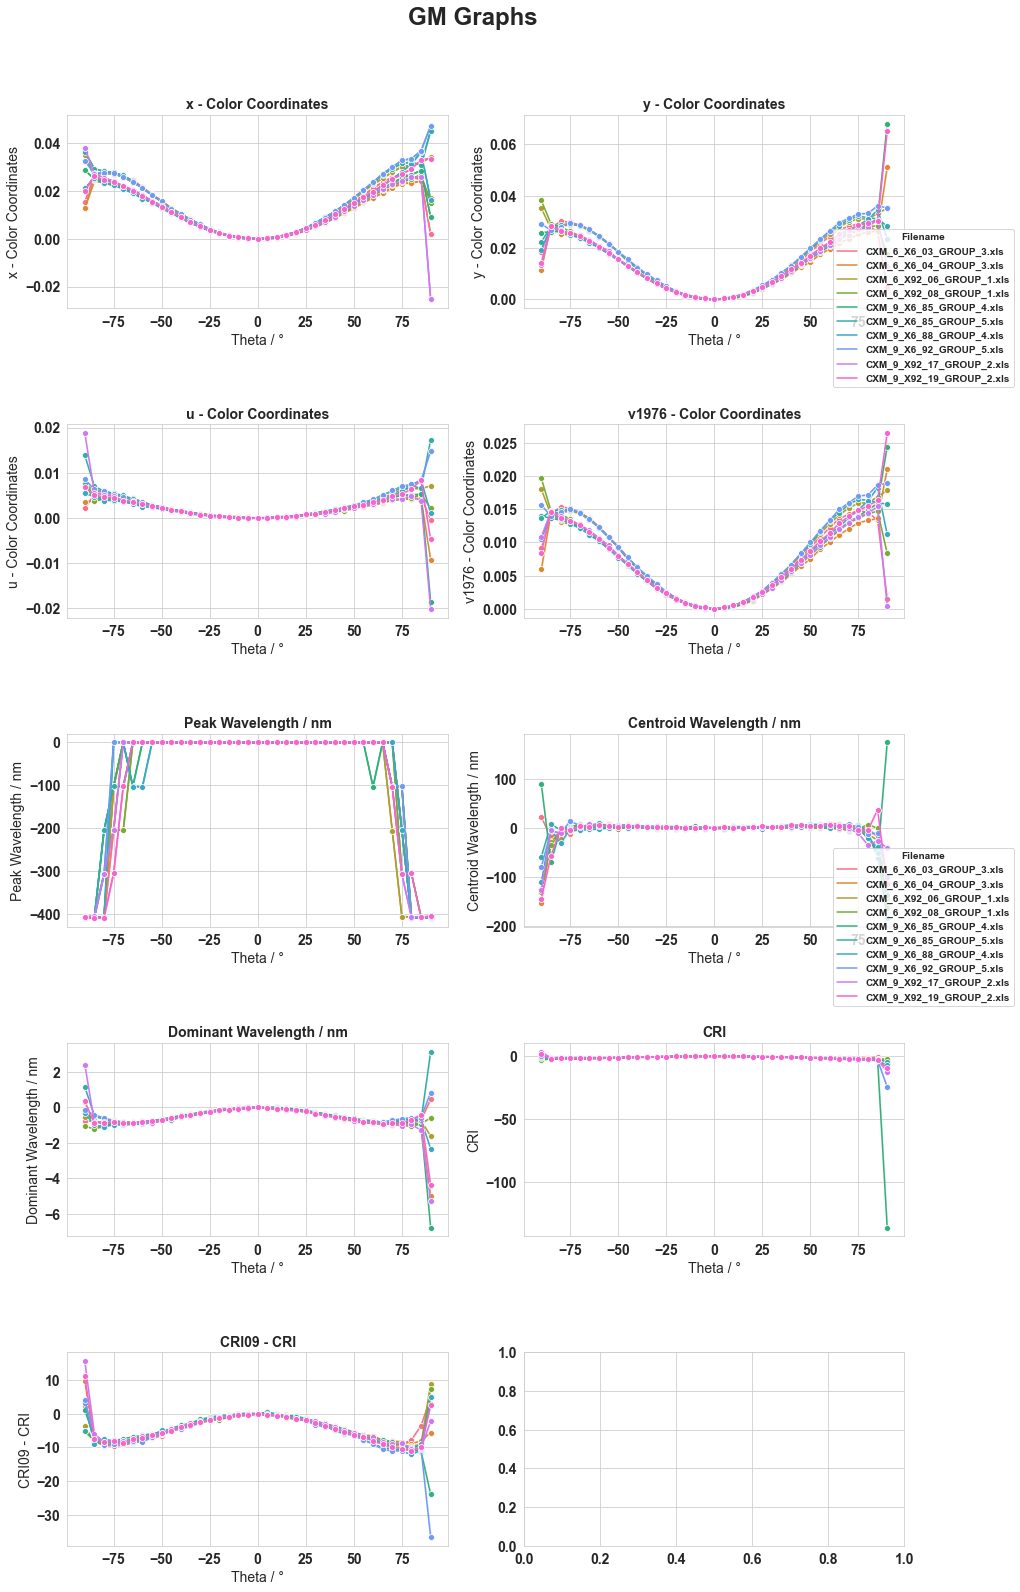

In [44]:
# Rest of the columns

sns.set_style("whitegrid")
f, axes = plt.subplots(row_size, column_size, figsize = (15,25))
plt.subplots_adjust(hspace = 0.6)
plt.subplots_adjust(top=0.92)
f.suptitle('GM Graphs', fontsize = 24, fontweight = 'bold')

# Change palette here
sns.set_palette("husl", 9)

for (a,b) in zip(y_n, ax_n):

    c = sns.lineplot(ax=axes[b], x='Theta / °', y=a, hue='Filename', data=dfthetaz, ci=False, legend=False, marker='o')

    axes[b].set_title(a, fontweight = 'bold', fontsize = 14)
 
 # Re-added c1 for legend
c1 = sns.lineplot(ax=axes[0,0], x='Theta / °', y=y1, hue='Filename', data=dfthetaz, ci=False, marker='o')

axes[0,0].set_title(y1, fontweight = 'bold', fontsize = 14)
c1.legend(loc='right', bbox_to_anchor=(2.5, 0), ncol=1).set_title('Filename') # , prop={'size': 6} <- increase legend size
c1.set_zorder(1)

c5 = sns.lineplot(ax=axes[2,0], x='Theta / °', y=y5, hue='Filename', data=dfthetaz, ci=False, marker='o')

axes[2,0].set_title(y5, fontweight = 'bold', fontsize = 14)
c5.legend(loc='right', bbox_to_anchor=(2.5, 0), ncol=1).set_title('Filename') # , prop={'size': 6} <- increase legend size
c5.set_zorder(1)

# pass the figure to the custom window
#a = ScrollableWindow(f);

In [45]:
if over == False:
    fname = output_f + '/Overlap_GM_Graphs_'
    version_png_f(fname)
else:
    f.savefig(output_f + '/Overlap_GM_Graphs.png')

In [46]:
# Export as Excel Worksheet if needed

fn = list(dfmaxz['Filename'].unique())

if exp == True:
    with pd.ExcelWriter(output_f + '/overlap_all_output_maxnorm.xlsx') as writer:
        for i in fn:
            dfmaxz[dfmaxz['Filename'] == i].to_excel(writer, sheet_name=i, index=False)
else:
    pass

In [47]:
# View outliers of all the parts

from scipy import stats

cols = list(df.select_dtypes(include=[np.number]).columns)
colsn = cols[4:]

for i in colsn:
    dfsn = df[(np.abs(stats.zscore(df[i])) > 3)]
    if dfsn.empty:
        pass
    else:
        print(i)
        display(dfsn)

Current - Currentsource / mA


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
68,CXM_6_X6_04_GROUP_3.xls,69,45,-65.0,15,50,49.97267,32.44215,0.782043,268.388993,0.454493,0.439361,0.246895,0.537018,631.558141,586.800662,579.718168,87.187613,32.507880
124,CXM_9_X6_85_GROUP_5.xls,125,135,25.0,15,50,49.97468,31.42532,2.446768,811.959489,0.423625,0.408211,0.240311,0.521026,631.575284,576.218465,580.392401,89.745783,43.588379
124,CXM_9_X92_17_GROUP_2.xls,125,135,25.0,15,50,49.97317,31.41319,2.408614,806.670645,0.420724,0.405537,0.239558,0.519549,631.590124,579.176517,580.438928,89.683169,44.591346


x - Color Coordinates


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
37,CXM_6_X6_03_GROUP_3.xls,38,45,90.0,15,50,49.99711,32.44240,0.046874,8.411180,0.488920,0.460844,0.258952,0.549184,225.473094,511.643423,580.539097,85.316554,40.222079
111,CXM_6_X6_03_GROUP_3.xls,112,135,90.0,15,50,50.00620,32.44220,0.042050,4.154762,0.492930,0.453822,0.264305,0.547506,221.000000,438.115986,581.567639,82.956348,30.455102
37,CXM_6_X6_04_GROUP_3.xls,38,45,90.0,15,50,50.00913,32.46652,0.054410,4.695356,0.496440,0.446277,0.269715,0.545538,221.692512,420.911436,582.648616,85.256096,32.191665
109,CXM_6_X6_04_GROUP_3.xls,110,90,85.0,15,50,50.01026,32.45525,0.133449,31.368150,0.473537,0.447957,0.254987,0.542729,226.092962,507.788005,580.569787,86.230211,30.279832
110,CXM_6_X6_04_GROUP_3.xls,111,90,90.0,15,50,50.00792,32.46038,0.060093,9.970329,0.499853,0.456781,0.267241,0.549480,224.309316,468.551578,581.794618,83.899648,32.768558
111,CXM_6_X6_04_GROUP_3.xls,112,135,90.0,15,50,49.99116,32.45056,0.032186,3.231856,0.486429,0.438579,0.266899,0.541449,227.543329,494.285594,582.738719,86.326139,22.742576
73,CXM_6_X92_06_GROUP_1.xls,74,45,-90.0,15,50,50.00257,32.43478,0.081824,6.034832,0.473313,0.450716,0.253720,0.543616,222.614988,342.061509,580.251471,88.656969,46.598600
37,CXM_9_X6_85_GROUP_4.xls,38,45,90.0,15,50,50.01076,31.46654,0.036493,1.777270,0.390058,0.373540,0.232788,0.501593,224.623438,367.222118,582.359623,95.249992,91.371385
110,CXM_9_X6_85_GROUP_4.xls,111,90,90.0,15,50,49.99721,31.45642,0.044149,1.783744,0.377525,0.419886,0.207329,0.518834,222.962543,376.566381,570.221252,84.168118,94.987683
111,CXM_9_X6_85_GROUP_4.xls,112,135,90.0,15,50,50.00753,31.45769,0.031672,1.929038,0.381959,0.389557,0.221080,0.507326,224.969634,445.120986,576.276577,81.245788,79.410842


y - Color Coordinates


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
110,CXM_6_X92_06_GROUP_1.xls,111,90,90.0,15,50,50.00064,32.43785,0.034161,1.459416,0.470074,0.475378,0.242169,0.551029,221.000000,372.629075,577.585538,84.674570,33.361080
36,CXM_6_X92_08_GROUP_1.xls,37,0,90.0,15,50,49.99428,32.43147,0.057313,1.376493,0.407733,0.361162,0.250201,0.498653,221.000000,328.652436,590.056458,75.439000,62.419406
110,CXM_6_X92_08_GROUP_1.xls,111,90,90.0,15,50,50.00388,32.43834,0.028009,1.686715,0.431342,0.355739,0.269329,0.499775,225.984122,410.540461,595.244983,84.111416,82.425088
111,CXM_6_X92_08_GROUP_1.xls,112,135,90.0,15,50,50.00651,32.43989,0.022974,1.180929,0.394199,0.481880,0.197244,0.542511,222.067086,391.902999,567.978097,76.852273,2.898412
37,CXM_9_X6_85_GROUP_4.xls,38,45,90.0,15,50,50.01076,31.46654,0.036493,1.777270,0.390058,0.373540,0.232788,0.501593,224.623438,367.222118,582.359623,95.249992,91.371385
36,CXM_9_X6_85_GROUP_5.xls,37,0,90.0,15,50,50.00216,31.44328,0.056730,2.895592,0.428363,0.465637,0.221636,0.542074,226.639711,346.265835,574.049712,78.600008,50.296815
0,CXM_9_X6_88_GROUP_4.xls,1,0,-90.0,15,50,50.00510,31.44732,0.043652,2.273295,0.418845,0.376165,0.250944,0.507091,223.696173,361.918527,586.638024,87.186897,65.515454
36,CXM_9_X6_92_GROUP_5.xls,37,0,90.0,15,50,50.00418,31.44530,0.042266,1.895071,0.469657,0.470380,0.243812,0.549420,223.515996,348.293409,577.989881,78.496701,35.084582
37,CXM_9_X92_17_GROUP_2.xls,38,45,90.0,15,50,50.00156,31.42862,0.002227,0.992586,0.381113,0.491002,0.187514,0.543558,231.480387,1756.271832,565.244405,46.228253,-48.221066
111,CXM_9_X92_17_GROUP_2.xls,112,135,90.0,15,50,50.00449,31.42482,0.042388,1.109288,0.536713,0.551541,0.251239,0.580905,224.783895,317.014526,577.186471,64.540956,-17.256448


u - Color Coordinates


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
37,CXM_6_X6_03_GROUP_3.xls,38,45,90.0,15,50,49.99711,32.44240,0.046874,8.411180,0.488920,0.460844,0.258952,0.549184,225.473094,511.643423,580.539097,85.316554,40.222079
111,CXM_6_X6_03_GROUP_3.xls,112,135,90.0,15,50,50.00620,32.44220,0.042050,4.154762,0.492930,0.453822,0.264305,0.547506,221.000000,438.115986,581.567639,82.956348,30.455102
37,CXM_6_X6_04_GROUP_3.xls,38,45,90.0,15,50,50.00913,32.46652,0.054410,4.695356,0.496440,0.446277,0.269715,0.545538,221.692512,420.911436,582.648616,85.256096,32.191665
110,CXM_6_X6_04_GROUP_3.xls,111,90,90.0,15,50,50.00792,32.46038,0.060093,9.970329,0.499853,0.456781,0.267241,0.549480,224.309316,468.551578,581.794618,83.899648,32.768558
111,CXM_6_X6_04_GROUP_3.xls,112,135,90.0,15,50,49.99116,32.45056,0.032186,3.231856,0.486429,0.438579,0.266899,0.541449,227.543329,494.285594,582.738719,86.326139,22.742576
36,CXM_6_X92_06_GROUP_1.xls,37,0,90.0,15,50,49.99813,32.42108,0.062849,2.333593,0.395721,0.412852,0.220987,0.518746,221.000000,317.206409,575.098845,91.724376,51.912935
147,CXM_6_X92_06_GROUP_1.xls,148,135,-90.0,15,50,49.99861,32.43764,0.057272,7.299693,0.470951,0.419687,0.265536,0.532422,225.584546,437.356574,583.873696,94.115277,56.615835
74,CXM_6_X92_08_GROUP_1.xls,75,90,-90.0,15,50,50.00267,32.43806,0.046831,9.315185,0.453614,0.412033,0.257839,0.526959,228.395494,488.018916,583.355719,87.744949,35.982535
110,CXM_6_X92_08_GROUP_1.xls,111,90,90.0,15,50,50.00388,32.43834,0.028009,1.686715,0.431342,0.355739,0.269329,0.499775,225.984122,410.540461,595.244983,84.111416,82.425088
111,CXM_6_X92_08_GROUP_1.xls,112,135,90.0,15,50,50.00651,32.43989,0.022974,1.180929,0.394199,0.481880,0.197244,0.542511,222.067086,391.902999,567.978097,76.852273,2.898412


v1976 - Color Coordinates


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
37,CXM_6_X6_03_GROUP_3.xls,38,45,90.0,15,50,49.99711,32.44240,0.046874,8.411180,0.488920,0.460844,0.258952,0.549184,225.473094,511.643423,580.539097,85.316554,40.222079
111,CXM_6_X6_03_GROUP_3.xls,112,135,90.0,15,50,50.00620,32.44220,0.042050,4.154762,0.492930,0.453822,0.264305,0.547506,221.000000,438.115986,581.567639,82.956348,30.455102
110,CXM_6_X6_04_GROUP_3.xls,111,90,90.0,15,50,50.00792,32.46038,0.060093,9.970329,0.499853,0.456781,0.267241,0.549480,224.309316,468.551578,581.794618,83.899648,32.768558
110,CXM_6_X92_06_GROUP_1.xls,111,90,90.0,15,50,50.00064,32.43785,0.034161,1.459416,0.470074,0.475378,0.242169,0.551029,221.000000,372.629075,577.585538,84.674570,33.361080
36,CXM_6_X92_08_GROUP_1.xls,37,0,90.0,15,50,49.99428,32.43147,0.057313,1.376493,0.407733,0.361162,0.250201,0.498653,221.000000,328.652436,590.056458,75.439000,62.419406
110,CXM_6_X92_08_GROUP_1.xls,111,90,90.0,15,50,50.00388,32.43834,0.028009,1.686715,0.431342,0.355739,0.269329,0.499775,225.984122,410.540461,595.244983,84.111416,82.425088
37,CXM_9_X6_85_GROUP_4.xls,38,45,90.0,15,50,50.01076,31.46654,0.036493,1.777270,0.390058,0.373540,0.232788,0.501593,224.623438,367.222118,582.359623,95.249992,91.371385
36,CXM_9_X6_92_GROUP_5.xls,37,0,90.0,15,50,50.00418,31.44530,0.042266,1.895071,0.469657,0.470380,0.243812,0.549420,223.515996,348.293409,577.989881,78.496701,35.084582
111,CXM_9_X92_17_GROUP_2.xls,112,135,90.0,15,50,50.00449,31.42482,0.042388,1.109288,0.536713,0.551541,0.251239,0.580905,224.783895,317.014526,577.186471,64.540956,-17.256448
37,CXM_9_X92_19_GROUP_2.xls,38,45,90.0,15,50,50.00094,31.44860,0.020045,1.184523,0.455367,0.537488,0.213308,0.566498,221.000000,421.088623,571.939010,-393.574307,49.197343


Centroid Wavelength / nm


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
0,CXM_6_X92_06_GROUP_1.xls,1,0,-90.0,15,50,50.00369,32.44767,0.057411,5.725942,0.417681,0.401380,0.239318,0.517450,221.000000,383.232391,580.737392,92.651972,69.491455
36,CXM_6_X92_06_GROUP_1.xls,37,0,90.0,15,50,49.99813,32.42108,0.062849,2.333593,0.395721,0.412852,0.220987,0.518746,221.000000,317.206409,575.098845,91.724376,51.912935
37,CXM_6_X92_06_GROUP_1.xls,38,45,90.0,15,50,50.01126,32.44320,0.043509,2.277497,0.415723,0.420793,0.230379,0.524674,221.000000,327.799387,577.320146,72.322737,45.456580
73,CXM_6_X92_06_GROUP_1.xls,74,45,-90.0,15,50,50.00257,32.43478,0.081824,6.034832,0.473313,0.450716,0.253720,0.543616,222.614988,342.061509,580.251471,88.656969,46.598600
110,CXM_6_X92_06_GROUP_1.xls,111,90,90.0,15,50,50.00064,32.43785,0.034161,1.459416,0.470074,0.475378,0.242169,0.551029,221.000000,372.629075,577.585538,84.674570,33.361080
111,CXM_6_X92_06_GROUP_1.xls,112,135,90.0,15,50,50.00236,32.43611,0.047248,0.815002,0.398407,0.390333,0.231390,0.510078,224.667487,349.544386,579.708413,67.227949,-7.405242
0,CXM_6_X92_08_GROUP_1.xls,1,0,-90.0,15,50,49.99399,32.43238,0.010423,5.680883,0.437547,0.431454,0.239675,0.531758,224.705090,1104.897466,578.805013,86.641546,27.659117
36,CXM_6_X92_08_GROUP_1.xls,37,0,90.0,15,50,49.99428,32.43147,0.057313,1.376493,0.407733,0.361162,0.250201,0.498653,221.000000,328.652436,590.056458,75.439000,62.419406
73,CXM_6_X92_08_GROUP_1.xls,74,45,-90.0,15,50,50.01812,32.45950,0.078562,6.869374,0.465407,0.438289,0.254020,0.538244,224.157930,360.989406,580.923940,87.752726,46.038629
111,CXM_6_X92_08_GROUP_1.xls,112,135,90.0,15,50,50.00651,32.43989,0.022974,1.180929,0.394199,0.481880,0.197244,0.542511,222.067086,391.902999,567.978097,76.852273,2.898412


Dominant Wavelength / nm


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
36,CXM_6_X92_06_GROUP_1.xls,37,0,90.0,15,50,49.99813,32.42108,0.062849,2.333593,0.395721,0.412852,0.220987,0.518746,221.000000,317.206409,575.098845,91.724376,51.912935
147,CXM_6_X92_06_GROUP_1.xls,148,135,-90.0,15,50,49.99861,32.43764,0.057272,7.299693,0.470951,0.419687,0.265536,0.532422,225.584546,437.356574,583.873696,94.115277,56.615835
36,CXM_6_X92_08_GROUP_1.xls,37,0,90.0,15,50,49.99428,32.43147,0.057313,1.376493,0.407733,0.361162,0.250201,0.498653,221.000000,328.652436,590.056458,75.439000,62.419406
110,CXM_6_X92_08_GROUP_1.xls,111,90,90.0,15,50,50.00388,32.43834,0.028009,1.686715,0.431342,0.355739,0.269329,0.499775,225.984122,410.540461,595.244983,84.111416,82.425088
111,CXM_6_X92_08_GROUP_1.xls,112,135,90.0,15,50,50.00651,32.43989,0.022974,1.180929,0.394199,0.481880,0.197244,0.542511,222.067086,391.902999,567.978097,76.852273,2.898412
147,CXM_6_X92_08_GROUP_1.xls,148,135,-90.0,15,50,50.00570,32.43836,0.035089,7.096065,0.457938,0.406668,0.263027,0.525551,230.330875,623.178011,584.668292,94.496567,70.840045
36,CXM_9_X6_85_GROUP_4.xls,37,0,90.0,15,50,50.01520,31.47439,0.021910,1.948519,0.392843,0.447256,0.207267,0.530945,224.292765,512.923944,570.462193,81.441490,23.268847
110,CXM_9_X6_85_GROUP_4.xls,111,90,90.0,15,50,49.99721,31.45642,0.044149,1.783744,0.377525,0.419886,0.207329,0.518834,222.962543,376.566381,570.221252,84.168118,94.987683
111,CXM_9_X6_85_GROUP_4.xls,112,135,90.0,15,50,50.00753,31.45769,0.031672,1.929038,0.381959,0.389557,0.221080,0.507326,224.969634,445.120986,576.276577,81.245788,79.410842
36,CXM_9_X6_85_GROUP_5.xls,37,0,90.0,15,50,50.00216,31.44328,0.056730,2.895592,0.428363,0.465637,0.221636,0.542074,226.639711,346.265835,574.049712,78.600008,50.296815


CRI


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
37,CXM_9_X92_17_GROUP_2.xls,38,45,90.0,15,50,50.00156,31.42862,0.002227,0.992586,0.381113,0.491002,0.187514,0.543558,231.480387,1756.271832,565.244405,46.228253,-48.221066
110,CXM_9_X92_17_GROUP_2.xls,111,90,90.0,15,50,50.00814,31.43038,0.012685,0.935163,0.398830,0.382823,0.234736,0.506960,226.524411,561.108136,581.558971,45.111354,-64.737529
37,CXM_9_X92_19_GROUP_2.xls,38,45,90.0,15,50,50.00094,31.44860,0.020045,1.184523,0.455367,0.537488,0.213308,0.566498,221.000000,421.088623,571.939010,-393.574307,49.197343
110,CXM_9_X92_19_GROUP_2.xls,111,90,90.0,15,50,50.00076,31.43594,0.035229,3.084796,0.488432,0.492452,0.246292,0.558719,227.057309,401.402572,577.739025,44.493623,34.054789


CRI09 - CRI


,Filename,Number,Phi / °,Theta / °,Integration Time / ms,Source current - Currentsource / mA,Current - Currentsource / mA,Voltage - Currentsource / V,Radiometric / W/m²,Photometric / lx,x - Color Coordinates,y - Color Coordinates,u - Color Coordinates,v1976 - Color Coordinates,Peak Wavelength / nm,Centroid Wavelength / nm,Dominant Wavelength / nm,CRI,CRI09 - CRI
0,CXM_6_X92_06_GROUP_1.xls,1,0,-90.0,15,50,50.00369,32.44767,0.057411,5.725942,0.417681,0.401380,0.239318,0.517450,221.000000,383.232391,580.737392,92.651972,69.491455
111,CXM_6_X92_06_GROUP_1.xls,112,135,90.0,15,50,50.00236,32.43611,0.047248,0.815002,0.398407,0.390333,0.231390,0.510078,224.667487,349.544386,579.708413,67.227949,-7.405242
36,CXM_6_X92_08_GROUP_1.xls,37,0,90.0,15,50,49.99428,32.43147,0.057313,1.376493,0.407733,0.361162,0.250201,0.498653,221.000000,328.652436,590.056458,75.439000,62.419406
110,CXM_6_X92_08_GROUP_1.xls,111,90,90.0,15,50,50.00388,32.43834,0.028009,1.686715,0.431342,0.355739,0.269329,0.499775,225.984122,410.540461,595.244983,84.111416,82.425088
111,CXM_6_X92_08_GROUP_1.xls,112,135,90.0,15,50,50.00651,32.43989,0.022974,1.180929,0.394199,0.481880,0.197244,0.542511,222.067086,391.902999,567.978097,76.852273,2.898412
147,CXM_6_X92_08_GROUP_1.xls,148,135,-90.0,15,50,50.00570,32.43836,0.035089,7.096065,0.457938,0.406668,0.263027,0.525551,230.330875,623.178011,584.668292,94.496567,70.840045
37,CXM_9_X6_85_GROUP_4.xls,38,45,90.0,15,50,50.01076,31.46654,0.036493,1.777270,0.390058,0.373540,0.232788,0.501593,224.623438,367.222118,582.359623,95.249992,91.371385
110,CXM_9_X6_85_GROUP_4.xls,111,90,90.0,15,50,49.99721,31.45642,0.044149,1.783744,0.377525,0.419886,0.207329,0.518834,222.962543,376.566381,570.221252,84.168118,94.987683
111,CXM_9_X6_85_GROUP_4.xls,112,135,90.0,15,50,50.00753,31.45769,0.031672,1.929038,0.381959,0.389557,0.221080,0.507326,224.969634,445.120986,576.276577,81.245788,79.410842
111,CXM_9_X6_85_GROUP_5.xls,112,135,90.0,15,50,49.98721,31.43417,0.008500,0.911679,0.395292,0.397052,0.226722,0.512396,230.713264,940.628357,577.712250,84.276009,97.090896


In [48]:
# Kills script so appendix doesn't run
sys.exit()

SystemExit: 